In [39]:
!pip install opencv-python

#### Kütüphanelerin Yüklenmesi

In [40]:
# Kütüphanelerin eklenmesi
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import math

#### Fonksiyon Tanımlanmaları

In [41]:
def resmi_goster(image, title,  cmap=None):
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.show()

In [42]:
def histogram_cizdir (image, title):
    # Histogramı hesapla
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    # Histogramı çiz
    plt.bar(bins[:-1], hist, width=1)
    plt.title(title)
    plt.show()

In [43]:
def histogram_cizdir2 (image, title):
    # Histogramı hesapla
    hist = cv2.calcHist([image], [0], None, [256],[0,256] )
    plt.bar(range(256), hist[:,0])
    plt.title(title)
    plt.show()

#### 1.	Görüntüyü yükleme, histogramını çizdirme 

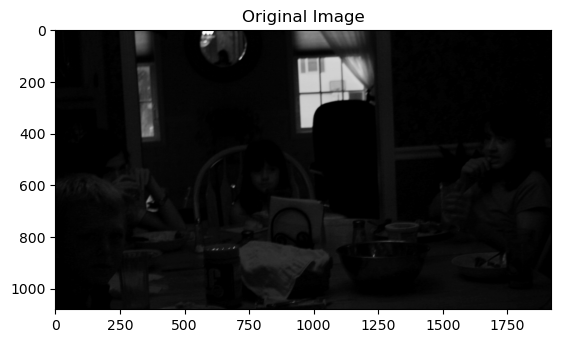

In [44]:
# Görüntünün yolu
path = "./goruntu3.png"

# Resim dosyasını oku
img = cv2.imread(path)

# Orijinal Resim
resmi_goster(img, "Original Image")



In [45]:
# Görüntünün renkli olup olmadığını kontrol et
if len(img.shape) == 2:
    print("Gri seviye")
else:
    print("Renkli görüntü")

Renkli görüntü


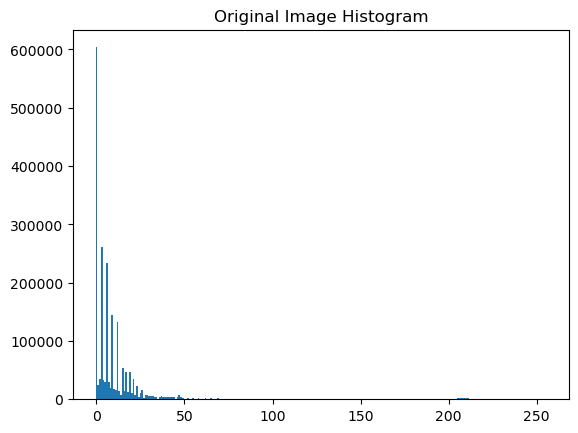

In [46]:
# Görüntünün siyah-beyaz olarak alınması
img_yeni_grayscale = cv2.imread(path, 0)

histogram_cizdir (img_yeni_grayscale, "Original Image Histogram")

#### 2.	Histogram eşitleme uygulama,  histogram eşitleme sonrası görüntüyü ve histogramını çizdirme 

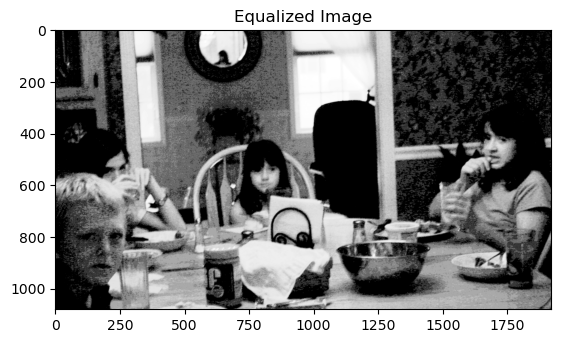

In [47]:
# Histogram eşitleme
equ = cv2.equalizeHist(img_yeni_grayscale)

# Histogram eşitleme sonrası ekrana bastırma
resmi_goster(equ, "Equalized Image", cmap="gray")


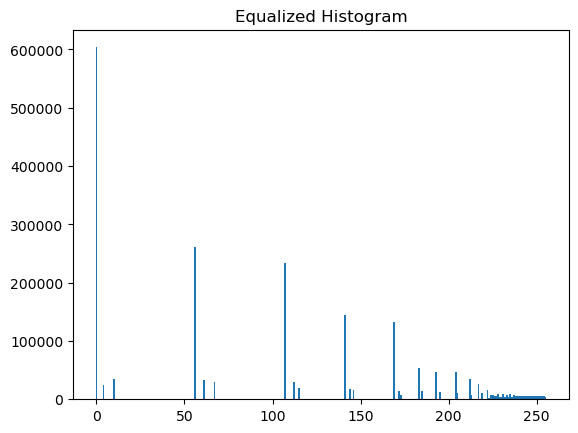

In [48]:
# Histogram eşitleme sonrası yeni histogramı çizdirme
histogram_cizdir (equ, "Equalized Histogram")


#### 3.	Görüntüye bicubic interpolasyon ile iki kat büyütme, görüntüyü ve histogramını çizdirme 

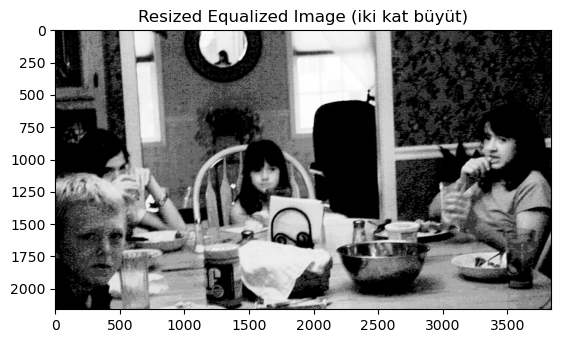

In [49]:
iki_kat_buyuyen_img = cv2.resize(equ, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Görüntüyü ekrana bastır
resmi_goster(iki_kat_buyuyen_img, "Resized Equalized Image (iki kat büyüt)", cmap="gray")


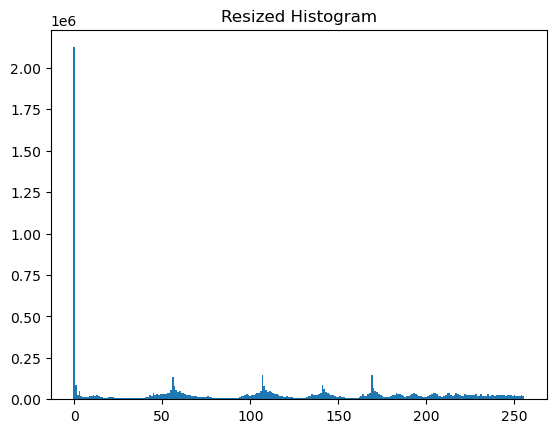

In [50]:
# Bicubit interpolasyon sonrası hisgoramı çizdirme
histogram_cizdir (iki_kat_buyuyen_img, "Resized Histogram")


#### 4.	Görüntüye unsharp masking ve highboost filtering uygulama, görüntüyü ve histogramını çizdirme 

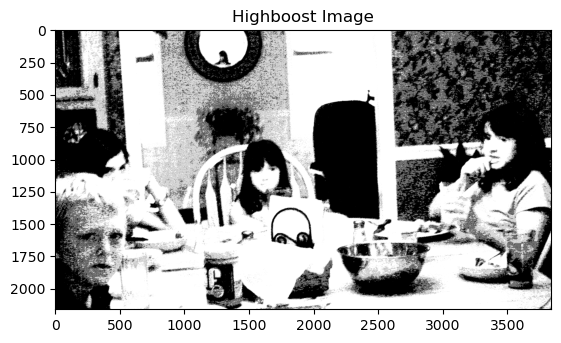

In [51]:
# Gaussian blur uygulaması
gauss_blur_img = cv2.GaussianBlur(iki_kat_buyuyen_img, (7,7), 0)

# Highboost filtreleme islemi
highboost_img = cv2.addWeighted(iki_kat_buyuyen_img,3, gauss_blur_img, -1, 0)

# Resmi göster
resmi_goster(highboost_img, "Highboost Image", cmap="gray")


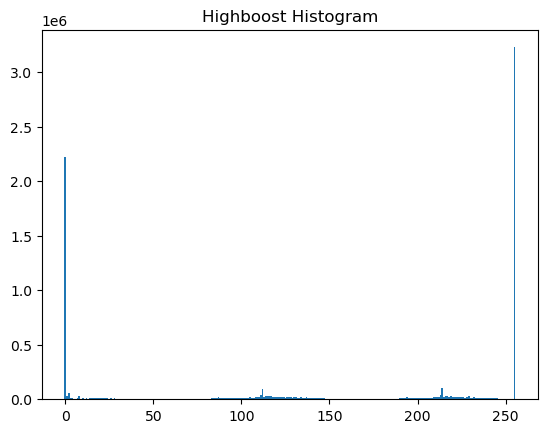

In [52]:
# Histogram çizdirme
histogram_cizdir (highboost_img, "Highboost Histogram")


#### 5.Highboost sonucunun dft2 sini alma dft2 yi shift etme, görüntüyü ve genlik spektrumunu çizdirme. 

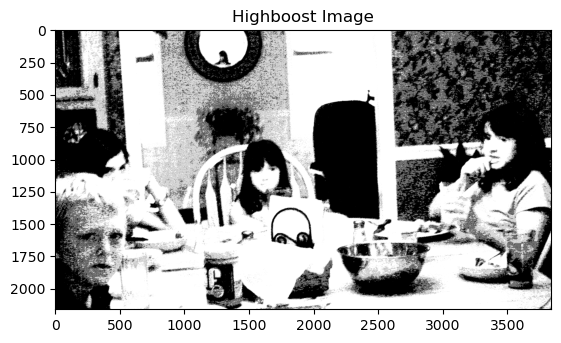

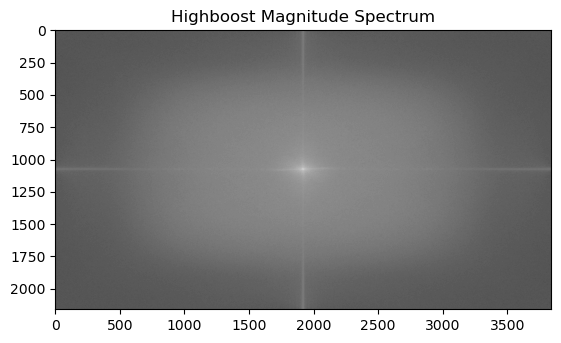

In [55]:
# Frekans domain ine dönüştürüyoruz
I = cv2.dft(np.float32(highboost_img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Kaydırma işlemi (Shift etme)
I_shift = np.fft.fftshift(I)

# Genlik spektrumu
magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0], I_shift[:,:,1]))

# Highboost Image resmini göster
resmi_goster(highboost_img, "Highboost Image", cmap="gray")

# Genlik spektrumunu gösterme
resmi_goster(magnitude_spectrum, "Highboost Magnitude Spectrum", cmap="gray")


#### 6.	Görüntüye yarı çapı 200 olan gauss alçak geçiren filtre uygulama gauss filtresini çizdirme 

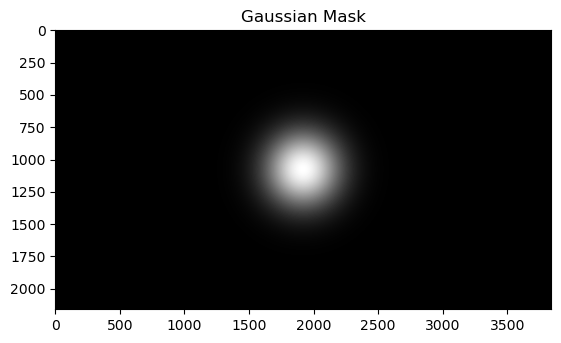

In [56]:
row, col = highboost_img.shape

# Yarıçap
D0 = 200

#Gauss LPF
H=[[math.exp(-((i-col/2)**2+(j-row/2)**2)/(2*D0**2)) for i in range(col)] for j in range(row)]

If = np.zeros((row, col, 2))
If[:,:,0] = I_shift[:,:,0] * H
If[:,:,1] = I_shift[:,:,1] * H

# Resmi göster
resmi_goster(H, "Gaussian Mask", cmap="gray")

#### 7.	Görüntünün ters dft2 sini alıp görüntünün son halini çizdirme

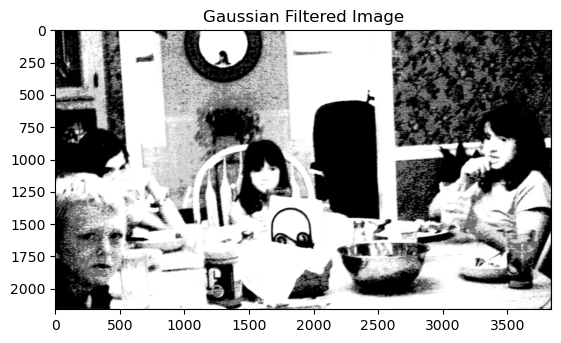

In [57]:
# Kaydırma işlemi
f_ishift = np.fft.ifftshift(If)

img_back = cv2.idft(f_ishift)

# Resmi göster
resmi_goster(img_back[:,:,0], "Gaussian Filtered Image", cmap="gray")